In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Create DataFrame 
df = pd.read_csv('NASDAQ 1962-2024.csv')
df['Date'] = pd.to_datetime(df2['Date'])

In [15]:
#Showing Dataframe
df.head()

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume
0,2008-01-29,AACG,NASDAQ,9.50,9.99,8.57,8.75,0.702589,1489000.0
1,2008-01-30,AACG,NASDAQ,8.75,9.15,8.30,8.50,0.682515,219000.0
2,2008-01-31,AACG,NASDAQ,8.49,10.30,8.49,9.55,0.766826,182300.0
3,2008-02-01,AACG,NASDAQ,9.93,9.94,9.50,9.51,0.763614,28200.0
4,2008-02-04,AACG,NASDAQ,9.50,9.71,9.50,9.50,0.762811,8300.0


In [16]:
df.tail()

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume
11470958,NaT,ZYXI,NASDAQ,11.01,11.01,10.86,11.00,11.00,62700.0
11470959,NaT,ZYXI,NASDAQ,11.01,11.01,10.84,10.88,10.88,62000.0
11470960,NaT,ZYXI,NASDAQ,10.89,10.99,10.56,10.56,10.56,67000.0
11470961,NaT,ZYXI,NASDAQ,10.53,10.63,10.42,10.58,10.58,60300.0
11470962,NaT,ZYXI,NASDAQ,10.52,10.63,10.43,10.47,10.47,50200.0


In [17]:
#Showing Dataframe Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470963 entries, 0 to 11470962
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Ticker     object        
 2   Exchange   object        
 3   Open       float64       
 4   High       float64       
 5   Low        float64       
 6   Close      float64       
 7   Adj Close  float64       
 8   Volume     float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 787.6+ MB


In [30]:
# Function to calculate daily returns
def calculate_daily_returns(df):
    df['Daily_Return'] = df['Close'].pct_change(fill_method=None)
    return df

In [31]:
calculate_daily_returns(df)

,Date,Ticker,Exchange,Open,High,Low,Close,Adj Close,Volume,Daily_Return
0,2008-01-29,AACG,NASDAQ,9.50,9.99,8.57,8.75,0.702589,1489000.0,NaN
1,2008-01-30,AACG,NASDAQ,8.75,9.15,8.30,8.50,0.682515,219000.0,-0.028571
2,2008-01-31,AACG,NASDAQ,8.49,10.30,8.49,9.55,0.766826,182300.0,0.123529
3,2008-02-01,AACG,NASDAQ,9.93,9.94,9.50,9.51,0.763614,28200.0,-0.004188
4,2008-02-04,AACG,NASDAQ,9.50,9.71,9.50,9.50,0.762811,8300.0,-0.001052
...,...,...,...,...,...,...,...,...,...,...
11470958,NaT,ZYXI,NASDAQ,11.01,11.01,10.86,11.00,11.000000,62700.0,-0.000908
11470959,NaT,ZYXI,NASDAQ,11.01,11.01,10.84,10.88,10.880000,62000.0,-0.010909
11470960,NaT,ZYXI,NASDAQ,10.89,10.99,10.56,10.56,10.560000,67000.0,-0.029412
11470961,NaT,ZYXI,NASDAQ,10.53,10.63,10.42,10.58,10.580000,60300.0,0.001894


In [26]:
# Function to plot the closing price for a specific ticker
def plot_closing_price(df, ticker):
    ticker_data = df[df['Ticker'] == ticker]
    plt.figure(figsize=(12, 6))
    plt.plot(ticker_data['Date'], ticker_data['Close'], label=ticker)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Closing Price of {ticker} Over Time')
    plt.legend()
    plt.show()

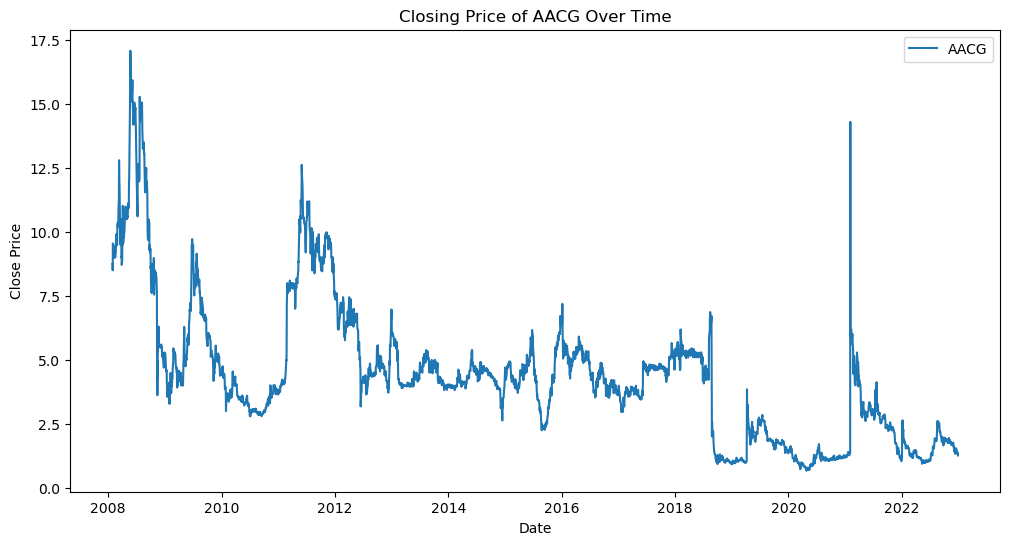

In [27]:
plot_closing_price(df, 'AACG')

In [32]:
# Function to plot the volume traded for a specific ticker
def plot_trading_volume(df, ticker):
    ticker_data = df[df['Ticker'] == ticker]
    plt.figure(figsize=(12, 6))
    plt.plot(ticker_data['Date'], ticker_data['Volume'], label=ticker, color='orange')
    plt.xlabel('Date')
    plt.ylabel('Volume Traded')
    plt.title(f'Trading Volume of {ticker} Over Time')
    plt.legend()
    plt.show()

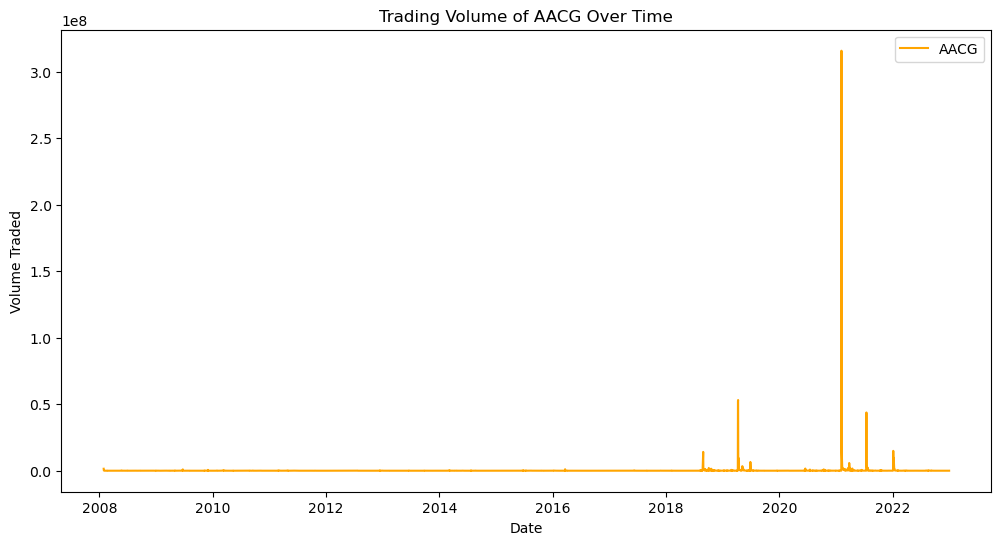

In [33]:
plot_trading_volume(df, 'AACG')

In [36]:
# Function to plot correlation heatmap for selected stocks
def plot_correlation_heatmap(df, tickers):
    selected_data = df[df['Ticker'].isin(tickers)]
    pivot_table = selected_data.pivot_table(index='Date', columns='Ticker', values='Close')
    correlation_matrix = pivot_table.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Selected Stocks')
    plt.show()

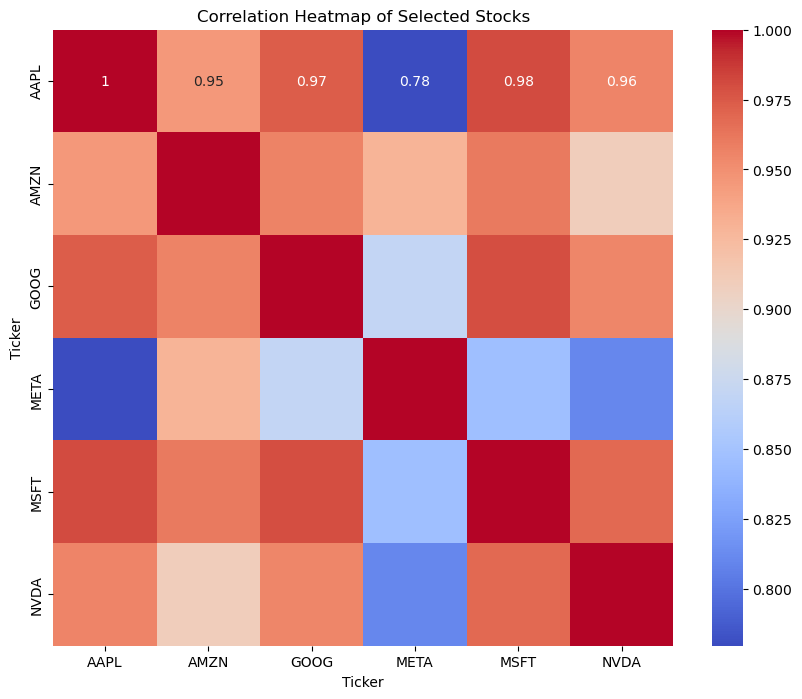

In [37]:
tickers = ['MSFT', 'AAPL', 'NVDA', 'GOOG', 'AMZN', 'META']
plot_correlation_heatmap(df, tickers)

In [38]:
# Function to calculate moving averages
def calculate_moving_averages(df, ticker, window=30):
    ticker_data = df[df['Ticker'] == ticker].copy()
    ticker_data['Moving_Avg'] = ticker_data['Close'].rolling(window=window).mean()
    return ticker_data

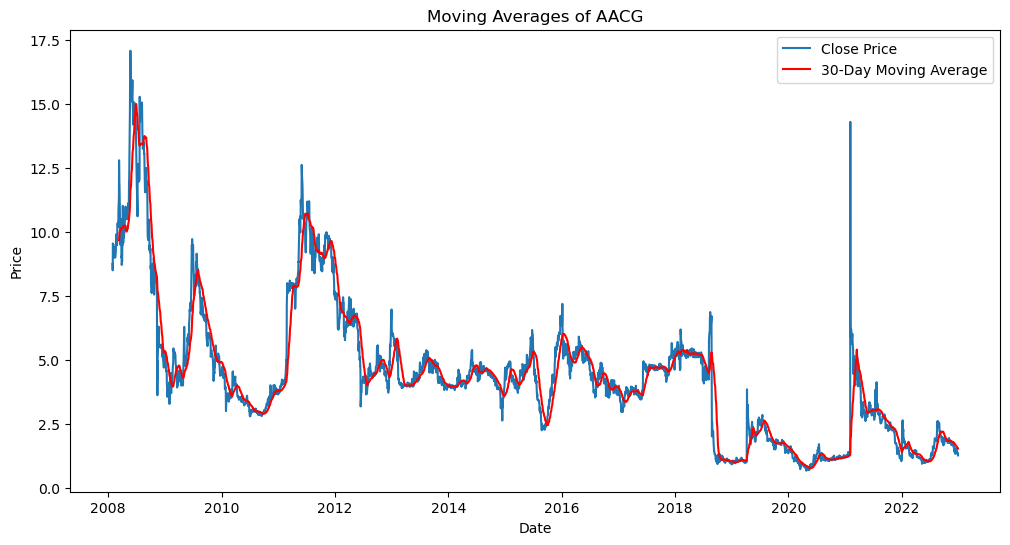

In [39]:
# Calculate and plot moving averages for a specific ticker
ma_df = calculate_moving_averages(df, 'AACG', window=30)
plt.figure(figsize=(12, 6))
plt.plot(ma_df['Date'], ma_df['Close'], label='Close Price')
plt.plot(ma_df['Date'], ma_df['Moving_Avg'], label='30-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Moving Averages of {ma_df["Ticker"].iloc[0]}')
plt.legend()
plt.show()

In [40]:
# Function to calculate annualized return and volatility
def calculate_annualized_metrics(df, ticker):
    ticker_data = df[df['Ticker'] == ticker]
    daily_returns = ticker_data['Daily_Return'].dropna()
    annualized_return = np.mean(daily_returns) * 252
    annualized_volatility = np.std(daily_returns) * np.sqrt(252)
    return annualized_return, annualized_volatility

In [41]:
# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(annualized_return, annualized_volatility, risk_free_rate=0.02):
    return (annualized_return - risk_free_rate) / annualized_volatility

In [42]:
# Function to suggest stocks to invest in
def suggest_stocks(df, tickers, risk_free_rate=0.02):
    suggestions = []
    for ticker in tickers:
        df = calculate_daily_returns(df)
        annualized_return, annualized_volatility = calculate_annualized_metrics(df, ticker)
        sharpe_ratio = calculate_sharpe_ratio(annualized_return, annualized_volatility, risk_free_rate)
        suggestions.append((ticker, sharpe_ratio))
    
    # Sort suggestions by Sharpe Ratio in descending order
    suggestions.sort(key=lambda x: x[1], reverse=True)
    
    return suggestions

In [43]:
#Function Usage
stock_suggestions = suggest_stocks(df, tickers)

# Display the suggestions
for ticker, sharpe_ratio in stock_suggestions:
    print(f'Ticker: {ticker}, Sharpe Ratio: {sharpe_ratio:.2f}')

Ticker: NVDA, Sharpe Ratio: 0.68
Ticker: AMZN, Sharpe Ratio: 0.63
Ticker: MSFT, Sharpe Ratio: 0.62
Ticker: GOOG, Sharpe Ratio: 0.56
Ticker: META, Sharpe Ratio: 0.50
Ticker: AAPL, Sharpe Ratio: 0.48
